In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import json
import numpy as np
import pandas as pd
import os

In [2]:
f=1 # select one coordinates every f frames
t=20 # fps
filename = 'clip_15'

In [3]:
open_path = 'Data/20180127_CHNvCAL/' + filename + '.json'
with open(open_path,'r') as file:
    json_data = json.load(file)
if json_data['tracks']['ball']!=[]:
    start_frame=json_data['event_frames']['shot']['start']
    end_frame=json_data['event_frames']['shot']['end']                                   
    C=pd.DataFrame.from_dict([json_data['tracks']['ball'][0]['x_ov'][start_frame:end_frame+1],json_data['tracks']['ball'][0]['y_ov'][start_frame:end_frame+1]])\
    .dropna(axis='columns').T.reset_index(drop=True)

    V=[]
    for i in range(int(C.shape[0]/f)-1):
        v=((C[0][f*(i+1)]-C[0][f*(i)])**2+(C[1][f*(i+1)]-C[1][f*(i)])**2)**0.5*(t/f)
        V.append(v)

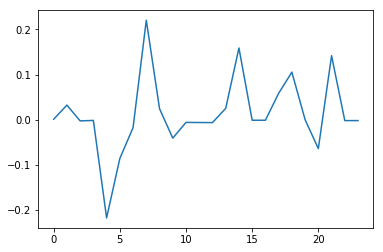

In [4]:
# direction change informationdirection=[]
direction = []
if json_data['camera_direction']=='left':
    for i in range(int(C.shape[0]/f)-1):
        di=[C[0][f*(i)]-C[0][f*(i+1)],C[1][f*(i+1)]-C[1][f*(i)]]
        direction.append(di)
else:
    for i in range(int(C.shape[0]/f)-1):
        di=[C[0][f*(i+1)]-C[0][f*(i)],C[1][f*(i+1)]-C[1][f*(i)]]
        direction.append(di)

direction = pd.DataFrame(direction)
vdc=[] # vertical direction change
hdc=[] # horizontal direction change
for i in range(int(direction.shape[0]-1)):
    vdc.append(direction[1][i+1]-direction[1][i]) 
    hdc.append(direction[0][i+1]-direction[0][i])
plt.plot(vdc)

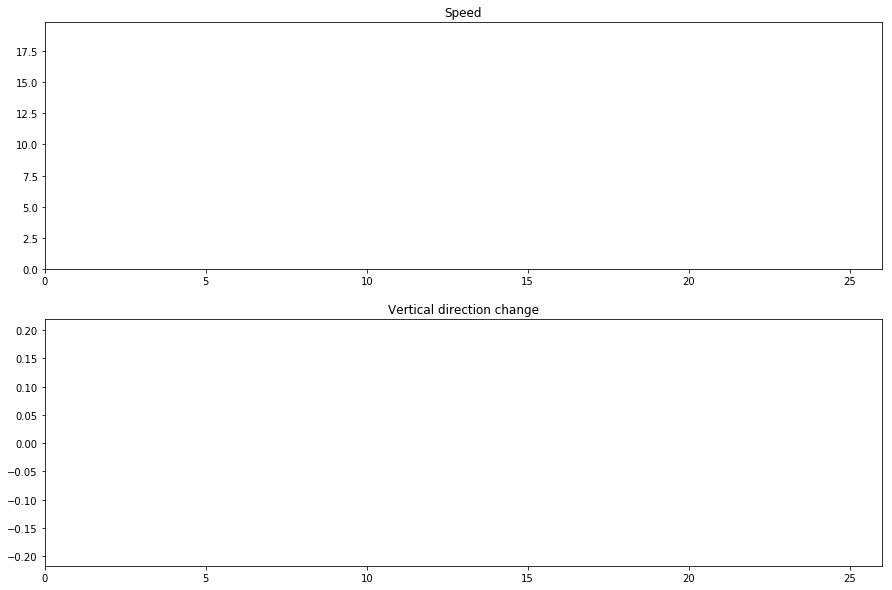

In [5]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,10))

# speed, = ax[0].plot(range(int(C.shape[0]/f)-1),V)
# vdc, = ax[1].plot(range(int(C.shape[0]/f)-2),vdc)

ax[0].set_xlim((0, int(C.shape[0]/f)))
ax[0].set_ylim((0, max(V)+5))

ax[1].set_xlim((0, int(C.shape[0]/f)))
ax[1].set_ylim((min(vdc), max(vdc)))

ax[0].set_title('Speed')
ax[1].set_title('Vertical direction change')

line1, = ax[0].plot([], [], lw=2)
line2, = ax[1].plot([], [], lw=2)

In [6]:
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1,)
    return (line2,)

def animate(i):
    x1 = range(int(C.shape[0]/f)-1)[:i]
    y1 = V[:i]
    line1.set_data(x1, y1)
    x2 = range(int(C.shape[0]/f)-1)[:i]
    y2 = vdc[:i]
    line2.set_data(x2, y2)
    return (line1,)
    return (line2,)

In [7]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=int(C.shape[0]/f-1), interval=50, blit=True) # speed

In [8]:
HTML(anim.to_html5_video())

In [9]:
save_path = '/Users/wyh/Desktop/Videos/' + filename + '.mp4'
anim.save(save_path,fps=20)

In [13]:
os.system('ffmpeg -i /Users/wyh/Desktop/Videos/vclip_15.mp4 -i /Users/wyh/Desktop/Videos/clip_15.mp4 \
-filter_complex hstack /Users/wyh/Desktop/Videos/combine_clip_15.mp4')


0

In [12]:
filename

'clip_15'